In [1]:
%load_ext autoreload
%autoreload 2

import os

import pandas as pd
import pyomo.core as po
import numpy as np
import matplotlib.pyplot as plt
import calliope
#calliope.set_log_verbosity()

In [12]:
# example model overrides
m = calliope.examples.urban_scale(scenario='eurocalliope_chp_simple,mapbox', override_dict={'model.subset_time': '2005-07'})

/Users/brynmorp/Repos/calliope/calliope/exceptions.py:60: ModelWarning:

Possible issues found during model processing:
 * Updated from coordinate system {'lon', 'lat', 'y', 'x'} to {'lon', 'lat'}, using overrides



In [65]:
m.get_formatted_array('energy_cap_max').to_pandas().mul({'boiler': 0.5,
'chp': 0.5,
'demand_electricity': 0.5,
'demand_heat': 0.5,
'heat_pipes:N1': 0.5,
'heat_pipes:X1': 0.5,
'heat_pipes:X2': 0.5,
'heat_pipes:X3': 0.5,
'power_lines:X1': 0.5,
'power_lines:X2': 0.5,
'power_lines:X3': 0.5,
'pv': 0.5,
'supply_gas': 0.5,
'supply_grid_power': 0.5,})

techs,boiler,chp,demand_electricity,demand_heat,heat_pipes:N1,heat_pipes:X1,heat_pipes:X2,heat_pipes:X3,power_lines:X1,power_lines:X2,power_lines:X3,pv,supply_gas,supply_grid_power
locs,,,,,,,,,,,,,,
N1,NaN,NaN,NaN,NaN,NaN,1000.0,1000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
X1,NaN,750.0,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,1000.0,1000.0,125.0,1000.0,1000.0
X2,300.0,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,1000.0,NaN,NaN,125.0,1000.0,NaN
X3,300.0,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,1000.0,NaN,NaN,25.0,1000.0,NaN


In [13]:
m.run(build_only=True)

<AxesSubplot:xlabel='X1::chp::heat', ylabel='X1::chp::electricity'>

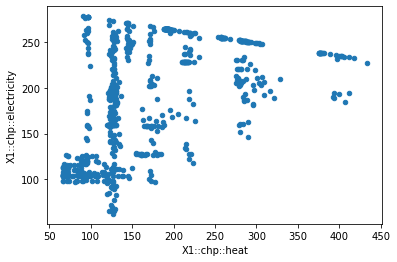

In [16]:
m.results.carrier_prod.loc[['X1::chp::heat', 'X1::chp::electricity']].to_series().unstack('loc_tech_carriers_prod').plot.scatter(x='X1::chp::heat', y='X1::chp::electricity')

In [14]:
for k, v in m._backend_model.energy_capacity_constraint.items():
    print(v.upper())

2000.0
2000.0
2000.0
2000.0
250.0
2000.0
600.0
2000.0
250.0
1500.0
2000.0
2000.0
2000.0
2000.0
2000.0
50.0
2000.0
600.0
2000.0
2000.0


In [40]:
for k, v in m._backend_model.energy_capacity_constraint.items():
    foo = v.body.args
    for i in foo:
        print(k, i.args)

AttributeError: '_GeneralVarData' object has no attribute 'args'

In [34]:
bar = foo.body.args[0]

In [35]:
bar.args[]

(<pyomo.core.base.param._ParamData at 0x7f873b26f4c0>,
 <pyomo.core.base.var._GeneralVarData at 0x7f8749c21460>)

In [28]:
print("\n".join([f"{i.name}: {len(i)}" for i in m._backend_model.component_objects() if isinstance(i, po.Constraint)]))

carrier_production_max_time_varying_constraint: 1488
chp_extraction_cb_constraint: 744
chp_extraction_cv_constraint: 744
resource_area_constraint: 3
resource_area_per_energy_capacity_constraint: 3
resource_area_capacity_per_loc_constraint: 3
energy_capacity_constraint: 20
carrier_production_max_constraint: 12648
carrier_consumption_max_constraint: 11904
resource_max_constraint: 2232
system_balance_constraint: 7440
balance_demand_constraint: 4464
balance_transmission_constraint: 7440
balance_supply_plus_constraint: 2232
resource_availability_supply_plus_constraint: 2232
cost_constraint: 20
cost_investment_constraint: 20
cost_var_constraint: 4464
symmetric_transmission_constraint: 10
balance_conversion_plus_primary_constraint: 2232
carrier_production_max_conversion_plus_constraint: 2232
cost_var_conversion_plus_constraint: 2232
export_balance_constraint: 2976


In [29]:
# Euro-calliope first run
model = calliope.read_netcdf('../outputs/model_48_out.nc')

In [66]:
print("\n".join([f"{k}: {v.to_series().where(lambda x: x != np.inf).dropna().max()}" for k, v in model.inputs.items() if pd.api.types.is_numeric_dtype(v)]))

energy_prod: 1.0
carrier_ratios.carrier_in.hydrogen: nan
carrier_ratios.carrier_out.methanol: nan
carrier_ratios.carrier_out.kerosene: nan
energy_cap_ratio.carrier_out_2.district_heat: nan
carrier_ratios.carrier_in_3.co2: nan
carrier_ratios.carrier_out.space_heat: nan
carrier_ratios.carrier_in_2.hydrogen: nan
carrier_ratios.carrier_out.diesel: nan
carrier_ratios.carrier_out_2.district_heat: nan
energy_cap_min: 0.198
carrier_ratios.carrier_out_2.diesel: nan
energy_cap_max: 14.311801470750897
carrier_ratios.carrier_out_3.diesel: nan
storage_loss: 0.021
force_resource: 1.0
energy_eff: 605.7
carrier_ratios.carrier_out.water_heat: nan
resource: 10.0
resource_eff: 1.0
lifetime: 60.0
energy_cap_per_storage_cap_max: 6.67
carrier_ratios.carrier_out_2.electricity: nan
carrier_ratios.carrier_out_2.methane: nan
cv: 0.42
storage_cap_max: 159.52360439999998
energy_cap_max_time_varying.carrier_out.water_heat: nan
carrier_ratios.carrier_in.electricity: nan
energy_cap_max_time_varying.carrier_out.space

In [73]:
1 / np.nan

nan

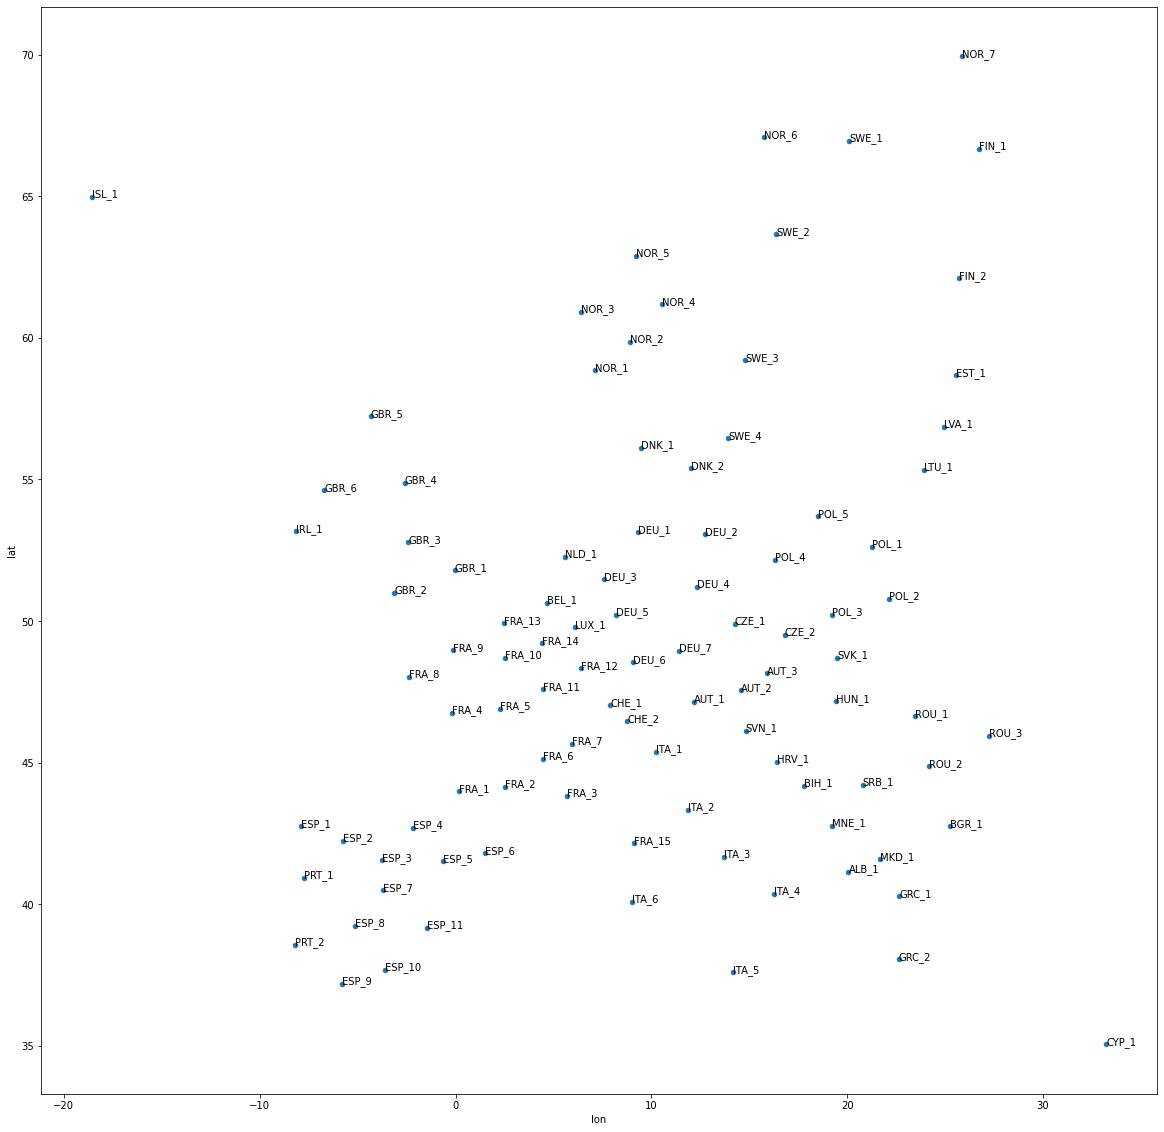

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
model.inputs.loc_coordinates.to_series().unstack('coordinates').plot.scatter(y='lat', x='lon', ax=ax)
for k, v in model.inputs.loc_coordinates.to_series().unstack('coordinates').iterrows():
    ax.annotate(k, xy=(v['lon'], v['lat']))

<AxesSubplot:>

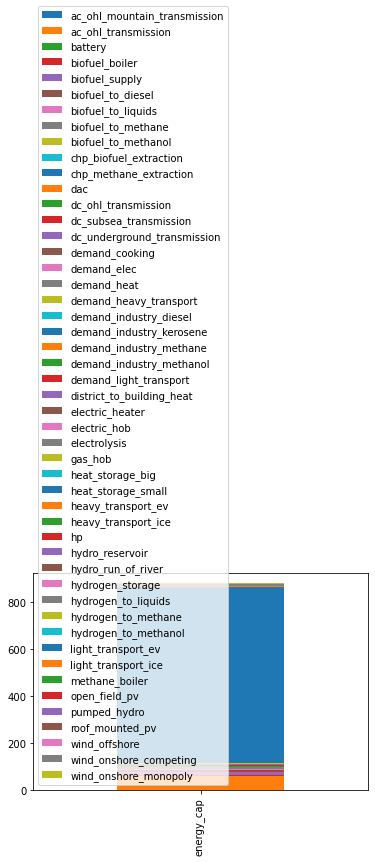

In [5]:
pd.read_csv('../2_day_cap.csv', index_col=0).T.plot.bar(stacked=True)

In [10]:
foo = pd.read_csv('../2_day_prod.csv', index_col=0).T
foo.index = pd.to_datetime(foo.index)

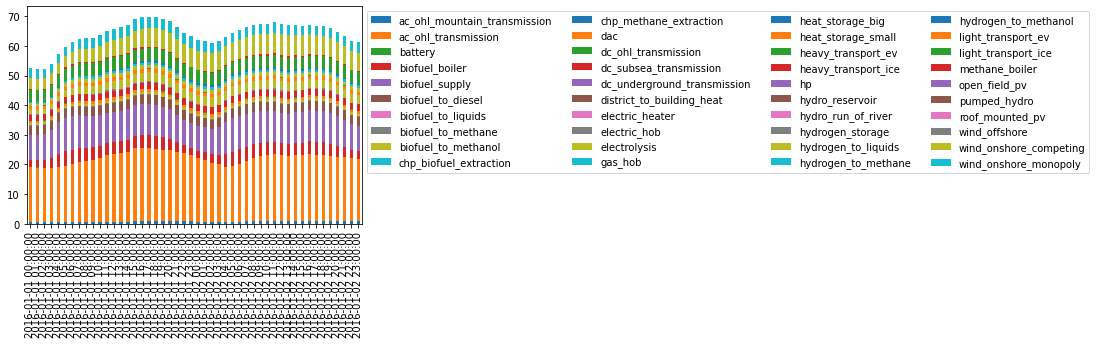

In [14]:
ax = foo.plot.bar(stacked=True)
ax.legend(ncol=4,bbox_to_anchor=(1, 1))

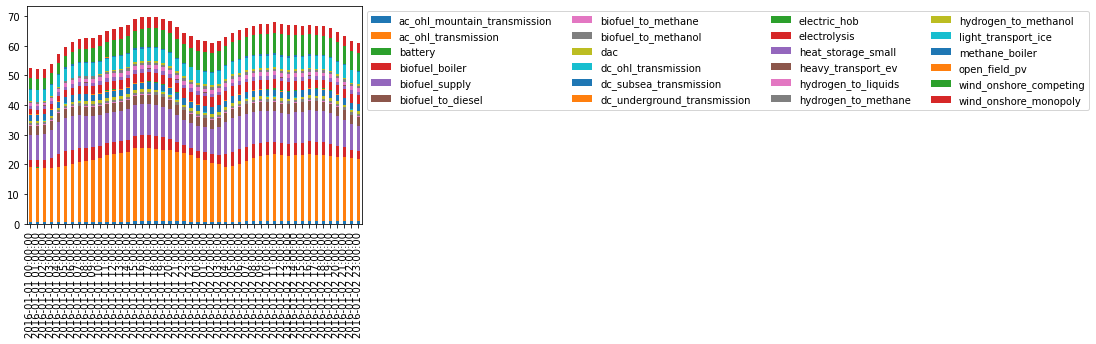

In [23]:
ax = foo.where(foo >= foo.max().max() * 1e-3).dropna(how='all', axis=1).plot.bar(stacked=True)
ax.legend(ncol=4,bbox_to_anchor=(1, 1))

<AxesSubplot:>

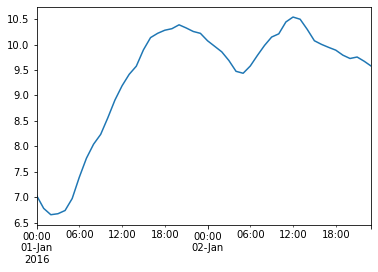

In [28]:
foo[['open_field_pv', 'pumped_hydro', 'roof_mounted_pv', 'wind_offshore', 'wind_onshore_competing', 'wind_onshore_monopoly']].sum(axis=1).plot()